# Feature engineering

We will formulate a method that (a) denoises a color image and (b) transforms it into a grayscale, based on the findings of data exploration. I was not sure if this method's requirement is to also prepare the image for training of the classifier so I also added that as part of the feature engineering.

* This will be our core image pre-processing method
* We will use opencv for the image pre-preprocessing
* opencv image preprocessing methods input/output is numpy.ndarray. This meets case study requirement
    * Originally opencv was implemented in C, then C++ with core object being CvMat, and cv::Mat respectivelly
    * The python wrappers are build upon numpy structures
* We will also add the img preprocessing needed for training in our keras model
    * that is resize the image the cnn expected img size 
    * we will use the 64x64 for our current experimentals custm cnn
        * This should be good enough given (a) the bluriness/crudness of the shapes of the preprocessed images, (b) allow fast training due to my limited resources
    * convert to float and normalize

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# def feature_engineer_to_infer(img, median_kernal_width=17, cnn_input_img_size = 64, conv_code = cv2.COLOR_RGB2GRAY):
#     img_medianclr = cv2.medianBlur(img, median_kernal_width)
#     img_medianclr_gray = cv2.cvtColor(img_medianclr, conv_code)
#     return img_medianclr_gray

In [3]:
def feature_engineer_to_train(img, median_kernal_width=17, cnn_input_img_size = 64, conv_code = cv2.COLOR_RGB2GRAY):
    # Assumes color image
    if len(img.shape) !=3 or img.shape[2] !=3:
        return None
    img_medianclr = cv2.medianBlur(img, median_kernal_width)
    out_img = cv2.cvtColor(img_medianclr, conv_code)
    out_img = cv2.resize(out_img, (cnn_input_img_size, cnn_input_img_size))
    out_img = np.array(out_img, dtype="float") / 255.0
    out_img = out_img.reshape(( out_img.shape[0], out_img.shape[1], 1)) # needed to reshape for the keras training module
    return out_img

In [4]:
img_path='../data/images/GICSD_1_4_133.png'
#img_path='/Users/antonios.ntelidakis/Documents/personal/revolut/Computer vision HT/data/images/GICSD_14_3_113.png'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

In [5]:
print(img.shape)
print(img.dtype)

(192, 192, 3)
uint8


In [6]:
img_processed = feature_engineer_to_train(img)

In [7]:
print(img_processed.shape)
print(img_processed.dtype)

(64, 64, 1)
float64


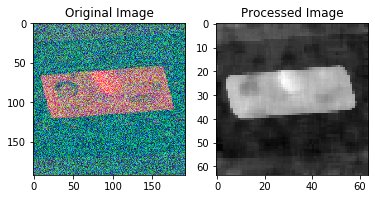

In [8]:
plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.subplot(122),plt.imshow(img_processed.reshape(img_processed.shape[0],img_processed.shape[1]), cmap='gray')
plt.title('Processed Image')
plt.show()